In [3]:
#документ в свободном доступе, буду очень рад видеть дополнения и комментарии.
#csv подгружу на диск, надо будет изменить ссылки в методе read_ csv.

from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from scipy.stats import shapiro

In [150]:
data = pd.read_csv('~/Desktop/World951.csv', sep=';', decimal=',', skip_blank_lines=True)
data.head()

,popul,density,city,n_religion,religion,l_exp_fem,l_exp_m,literacy,p_growth,child_death,...,log_gnp,lg_lev_spid,birth_to_death,children,log_popul,harvest,literacy_male,literacy_fem,climate,filter
0,17800,2.3,85,4,Protstnt,80,74,100,1.38,7.3,...,4.226548,"1,926784394","1,875","1,9",4.250420,6,100,100,3,0
1,8000,94.0,58,2,Catholic,79,73,99,0.20,6.7,...,4.264723,"1,704203962","1,090909091","1,5",3.903090,17,,,8,1
2,7400,86.0,54,1,Muslim,75,67,98,1.40,35.0,...,3.477121,,"3,285714286","2,8",3.869232,18,100,100,3,0
3,58400,237.0,89,4,Protstnt,80,74,99,0.20,7.2,...,4.203414,"1,729047295","1,181818182","1,83",4.766413,29,,,8,1
4,33900,12.0,86,2,Catholic,75,68,95,1.30,25.6,...,3.532500,"1,63027933","2,222222222","2,8",4.530200,9,96,95,8,1


In [151]:
#не обязательно для выполнения для вашего датасета
#в основном боролся с изменением , на . в Excel, стирал пробелы и изменял тип данных
data['city'] = [x.replace(',', '.') for x in data['city']]
data['n_religion'] = [x.replace(',', '.') for x in data['n_religion']]
data['literacy'] = [x.replace(',', '.') for x in data['literacy']]
data['region'] = [x.replace(',', '.') for x in data['region']]
data['calory'] = [x.replace(',', '.') for x in data['calory']]
data['spid'] = [x.replace(',', '.') for x in data['spid']]
data['lev_death'] = [x.replace(',', '.') for x in data['lev_death']]
data['lev_spid'] = [x.replace(',', '.') for x in data['lev_spid']]
data['lg_lev_spid'] = [x.replace(',', '.') for x in data['lg_lev_spid']]
data['birth_to_death'] = [x.replace(',', '.') for x in data['birth_to_death']]
data['children'] = [x.replace(',', '.') for x in data['children']]
data['harvest'] = [x.replace(',', '.') for x in data['harvest']]
data['literacy_male'] = [x.replace(',', '.') for x in data['literacy_male']]
data['literacy_fem'] = [x.replace(',', '.') for x in data['literacy_fem']]
data['climate'] = [x.replace(',', '.') for x in data['climate']]
data['filter'] = [x.replace(',', '.') for x in data['filter']]

data['city'] = [x.replace(' ', 'nan') for x in data['city']]
data['n_religion'] = [x.replace(' ', 'nan') for x in data['n_religion']]
data['literacy'] = [x.replace(' ', 'nan') for x in data['literacy']]
data['region'] = [x.replace(' ', 'nan') for x in data['region']]
data['calory'] = [x.replace(' ', 'nan') for x in data['calory']]
data['spid'] = [x.replace(' ', 'nan') for x in data['spid']]
data['lev_death'] = [x.replace(' ', 'nan') for x in data['lev_death']]
data['lev_spid'] = [x.replace(' ', 'nan') for x in data['lev_spid']]
data['lg_lev_spid'] = [x.replace(' ', 'nan') for x in data['lg_lev_spid']]
data['birth_to_death'] = [x.replace(' ', 'nan') for x in data['birth_to_death']]
data['children'] = [x.replace(' ', 'nan') for x in data['children']]
data['harvest'] = [x.replace(' ', 'nan') for x in data['harvest']]
data['literacy_male'] = [x.replace(' ', 'nan') for x in data['literacy_male']]
data['literacy_fem'] = [x.replace(' ', 'nan') for x in data['literacy_fem']]
data['climate'] = [x.replace(' ', 'nan') for x in data['climate']]
data['filter'] = [x.replace(' ', 'nan') for x in data['filter']]

data['city'] = data['city'].astype('float')
data['n_religion'] = data['n_religion'].astype('float')
data['literacy'] = data['literacy'].astype('float')
data['region'] = data['region'].astype('float')
data['calory'] = data['calory'].astype('float')
data['spid'] = data['spid'].astype('float')
data['lev_death'] = data['lev_death'].astype('float')
data['lev_spid'] = data['lev_spid'].astype('float')
data['lg_lev_spid'] = data['lg_lev_spid'].astype('float')
data['birth_to_death'] = data['birth_to_death'].astype('float')
data['children'] = data['children'].astype('float')
data['harvest'] = data['harvest'].astype('float')
data['literacy_male'] = data['literacy_male'].astype('float')
data['literacy_fem'] = data['literacy_fem'].astype('float')
data['climate'] = data['climate'].astype('float')
data['filter'] = data['filter'].astype('float')

data.head()

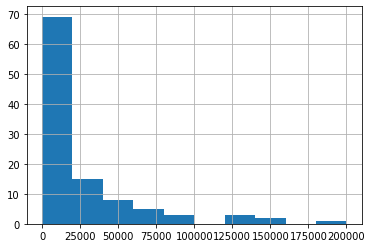

In [153]:
data['popul'].hist(range=(0, 200000))

### The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

In [5]:
stat, p = shapiro(data['popul'])

In [6]:
p

1.2102364835576842e-20

### The Kolomogorov-Smirnov
#This performs a test of the distribution F(x) of an observed random variable against a given distribution G(x).
#Under the null hypothesis the two distributions are identical, F(x)=G(x). 
#The alternative hypothesis can be either ‘two-sided’ (default), ‘less’ or ‘greater’.

In [7]:
stats.kstest(data['popul'], 'norm', args=(data['popul'].mean(), np.std(data['popul'])))

KstestResult(statistic=0.37258778946218607, pvalue=4.322960350721582e-14)

### D’Agostino’s K^2 Test

In [30]:
stats.normaltest(data['popul'])

NormaltestResult(statistic=177.5825929286158, pvalue=2.744289377181602e-39)

### Pearson correlation coefficient and p-value for testing non-correlation.
The Pearson correlation coefficient measures the linear relationship between two datasets. The calculation of the p-value relies on the assumption that each dataset is normally distributed.

In [8]:
stats.pearsonr(data['popul'], data['gnp'])

(-0.086712847250477, 0.369952788390713)

### The Spearman correlation 
It is a nonparametric measure of the monotonicity of the relationship between two datasets. Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed. 

If axis=0 (default), then each column represents a variable, with observations in the rows.

In [9]:
stats.spearmanr(data['popul'] , data['gnp'],  axis=0, nan_policy='omit')

SpearmanrResult(correlation=-0.18276533144950483, pvalue=0.05714733743113987)

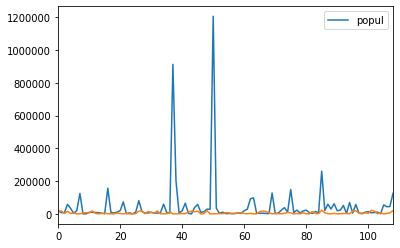

In [10]:
ax = data['popul'].plot(legend=True)
data['gnp'].plot(ax=ax)

### FISHER test
Критерий Фишера применяется для проверки равенства дисперсий двух выборок. Его относят к критериям рассеяния.

In [11]:
F = np.var(data['l_exp_fem']) / np.var(data['l_exp_m'])
df1 = len(data['l_exp_fem']) - 1
df2 = len(data['l_exp_m']) - 1
alpha = 0.05 #Or whatever you want your alpha to be.
p_value = stats.f.cdf(F, df1, df2)
if p_value > alpha:
    print('Reject the null hypothesis that Var(X) == Var(Y)')

Reject the null hypothesis that Var(X) == Var(Y)


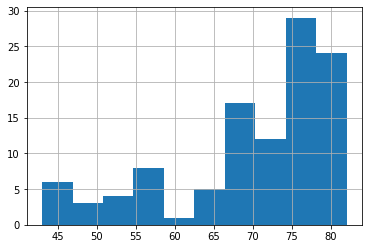

In [12]:
data['l_exp_fem'].hist()

### Тест Бартлетта
Bartlett’s test tests the null hypothesis that all input samples are from populations with equal variances.

In [13]:
stats.bartlett(data['l_exp_fem'],data['l_exp_m'])

BartlettResult(statistic=1.8426254548948435, pvalue=0.17464353939070193)

### Тест Левина
The Levene test tests the null hypothesis that all input samples are from populations with equal variances. 

При р > 0,05 различие дисперсии между данными группами не значимо, следовательно, их можно рассматривать как гомогенные.

In [14]:
stats.levene(data['l_exp_fem'],data['l_exp_m'])

LeveneResult(statistic=1.0566745639640653, pvalue=0.3051245981817433)

### Student’s t-test
Обычный t-тест исходит из предположения, что дисперсии в группах одинаковы. Обычно, это предположение нереалистично.  Однако есть аргемент, который указывает условие равенства дисперсий.

•	Observations in each sample are independent and identically distributed (iid).
•	Observations in each sample are normally distributed.
•	Observations in each sample have the same variance.


In [17]:
stats.ttest_ind(data['l_exp_fem'], data['l_exp_m'], equal_var = True)

Ttest_indResult(statistic=3.8892747514917407, pvalue=0.00013385663481817604)

### Welsh's t-test

In [20]:
stats.ttest_ind(data['l_exp_fem'], data['l_exp_m'], equal_var=False)

Ttest_indResult(statistic=3.8892747514917407, pvalue=0.00013448066145560063)

### ANOVA test
Tests whether the means of two or more independent samples are significantly different.
Assumptions

•	Observations in each sample are independent and identically distributed (iid).

•	Observations in each sample are normally distributed.

•	Observations in each sample have the same variance.

Interpretation

•	H0: the means of the samples are equal.

•	H1: one or more of the means of the samples are unequal.

Same as T-Test but can be used several variables!


In [21]:
stats.f_oneway(data['l_exp_fem'], data['l_exp_m'])

F_onewayResult(statistic=15.126458092591077, pvalue=0.00013385663481818154)

### Paired Student’s t-test
Tests whether the means of two paired samples are significantly different.
Assumptions
•	Observations in each sample are independent and identically distributed (iid).
•	Observations in each sample are normally distributed.
•	Observations in each sample have the same variance.
•	Observations across each sample are paired.

•	H0: the means of the samples are equal.


In [22]:
stats.ttest_rel(data['l_exp_fem'], data['l_exp_m'])

Ttest_relResult(statistic=24.10883266808265, pvalue=2.8413171688434744e-45)

### U-критерий Манна Уитни
Критерий Манна-Уитни проверяет гипотезу о статистической однородности двух выборок. 
The Mann-Whitney U test is a nonparametric statistical significance test for determining whether two independent samples were drawn from a population with the same distribution.

Fail to Reject H0: Sample distributions are equal.
Reject H0: Sample distributions are not equal.

For the test to be effective, it requires at least 20 observations in each data sample.



In [23]:
stats.mannwhitneyu(data['l_exp_fem'],data['l_exp_m'])

MannwhitneyuResult(statistic=3556.0, pvalue=1.4976535275127555e-07)

### Критерий Вилкоксона 
The default assumption for the test, the null hypothesis, is that the two samples have the same distribution.

Fail to Reject H0: Sample distributions are equal.
Reject H0: Sample distributions are not equal.

H0: медиана разницы в популяции равна нулю
H1: медиана разницы в популяции не равна нулю.


In [24]:
stats.wilcoxon(data['l_exp_fem'],data['l_exp_m'])

WilcoxonResult(statistic=3.0, pvalue=1.5767911382863993e-19)

### ранговый дисперсионный анализ Фридмана 
Tests whether the distributions of two or more paired samples are equal or not.

Assumptions
•	Observations in each sample are independent and identically distributed (iid).
•	Observations in each sample can be ranked.
•	Observations across each sample are paired.


In [26]:
stats.friedmanchisquare(data['l_exp_fem'],data['l_exp_m'], data['gnp']) # больше 3 переменных нужно

FriedmanchisquareResult(statistic=215.53563218390815, pvalue=1.5740993678217856e-47)

### критерий Краскела – Уоллеса (Kruskal – Wallis).
#The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. 
#It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have 
#different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs. 
#Post-hoc comparisons between groups are required to determine which groups are different.


In [27]:
stats.kruskal(data['l_exp_fem'],data['l_exp_m'])

KruskalResult(statistic=26.263745731916636, pvalue=2.978274198697325e-07)

### Тест Тьюка

In [5]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
data = pd.read_csv('~/Desktop/Python/SPSS/3.csv', sep=';', decimal=',', skip_blank_lines=True)

In [6]:
data = data[['1','2','3','4','5']]
stacked_data = data.stack().reset_index()

In [7]:
stacked_data = stacked_data.rename(columns={'level_0': 'id',
                                            'level_1': 'group',
                                            0:'result'})

In [8]:
MultiComp = MultiComparison(stacked_data['result'],
                            stacked_data['group'])
print(MultiComp.tukeyhsd(alpha=0.01).summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.01 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   -0.096  0.001 -0.1549 -0.0371   True
     1      3    0.042 0.0945 -0.0169  0.1009  False
     1      4    0.022  0.621 -0.0369  0.0809  False
     1      5    0.106  0.001  0.0471  0.1649   True
     2      3    0.138  0.001  0.0791  0.1969   True
     2      4    0.118  0.001  0.0591  0.1769   True
     2      5    0.202  0.001  0.1431  0.2609   True
     3      4    -0.02 0.6896 -0.0789  0.0389  False
     3      5    0.064 0.0048  0.0051  0.1229   True
     4      5    0.084  0.001  0.0251  0.1429   True
----------------------------------------------------
